In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [7]:
toyota = pd.read_csv("C:\\Users\\Admin\\Downloads\\ToyotaCorolla.csv", encoding='unicode_escape')

In [8]:
toyota1= toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [9]:
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
toyota1.rename(columns={"Age_08_04":"Age"},inplace=True)


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
toyota1

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
toyota1.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [13]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age            1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
toyota1.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [15]:
toyota1[toyota1.duplicated()].shape

(1, 9)

In [16]:
toyota1[toyota1.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
toyota2=toyota1.drop_duplicates()

In [18]:
toyota2

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [19]:
toyota2.shape

(1435, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c268329220>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2683298e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c268320e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c268329fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2683352e0>],
 'means': []}

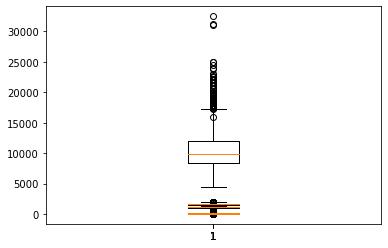

In [20]:
plt.boxplot(toyota2["Price"])
plt.boxplot(toyota2["Age"])
plt.boxplot(toyota2["HP"])
plt.boxplot(toyota2["cc"])
plt.boxplot(toyota2["Quarterly_Tax"])
plt.boxplot(toyota2["Weight"])

(array([664., 620., 107.,  18.,  19.,   2.,   0.,   4.,   0.,   1.]),
 array([1000. , 1061.5, 1123. , 1184.5, 1246. , 1307.5, 1369. , 1430.5,
        1492. , 1553.5, 1615. ]),
 <a list of 10 Patch objects>)

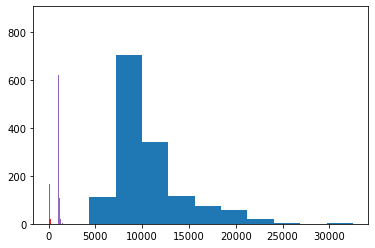

In [21]:
plt.hist(toyota2["Price"]) 
plt.hist(toyota2["Age"]) 
plt.hist(toyota2["HP"])
plt.hist(toyota2["Quarterly_Tax"]) 
plt.hist(toyota2["Weight"]) 

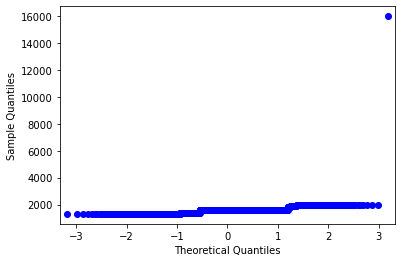

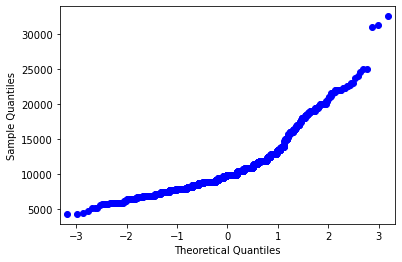

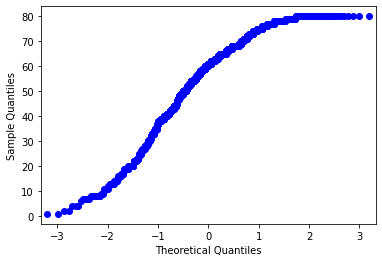

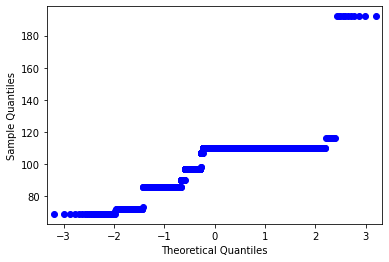

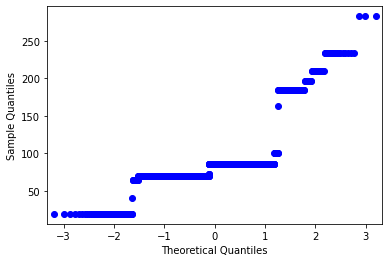

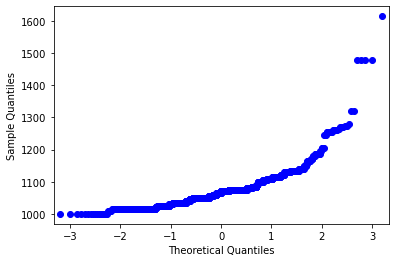

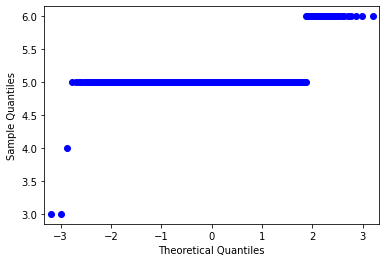

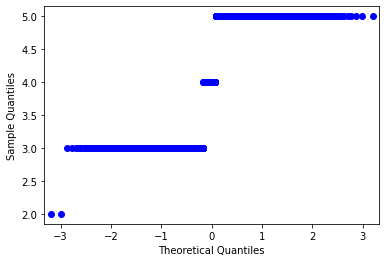

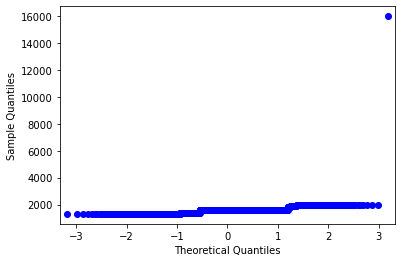

In [22]:
import statsmodels.api as sm
sm.graphics.qqplot(toyota2["Price"]) 
sm.graphics.qqplot(toyota2["Age"]) 
sm.graphics.qqplot(toyota2["HP"])
sm.graphics.qqplot(toyota2["Quarterly_Tax"]) 
sm.graphics.qqplot(toyota2["Weight"]) 
sm.graphics.qqplot(toyota2["Gears"]) 
sm.graphics.qqplot(toyota2["Doors"]) 
sm.graphics.qqplot(toyota2["cc"]) 

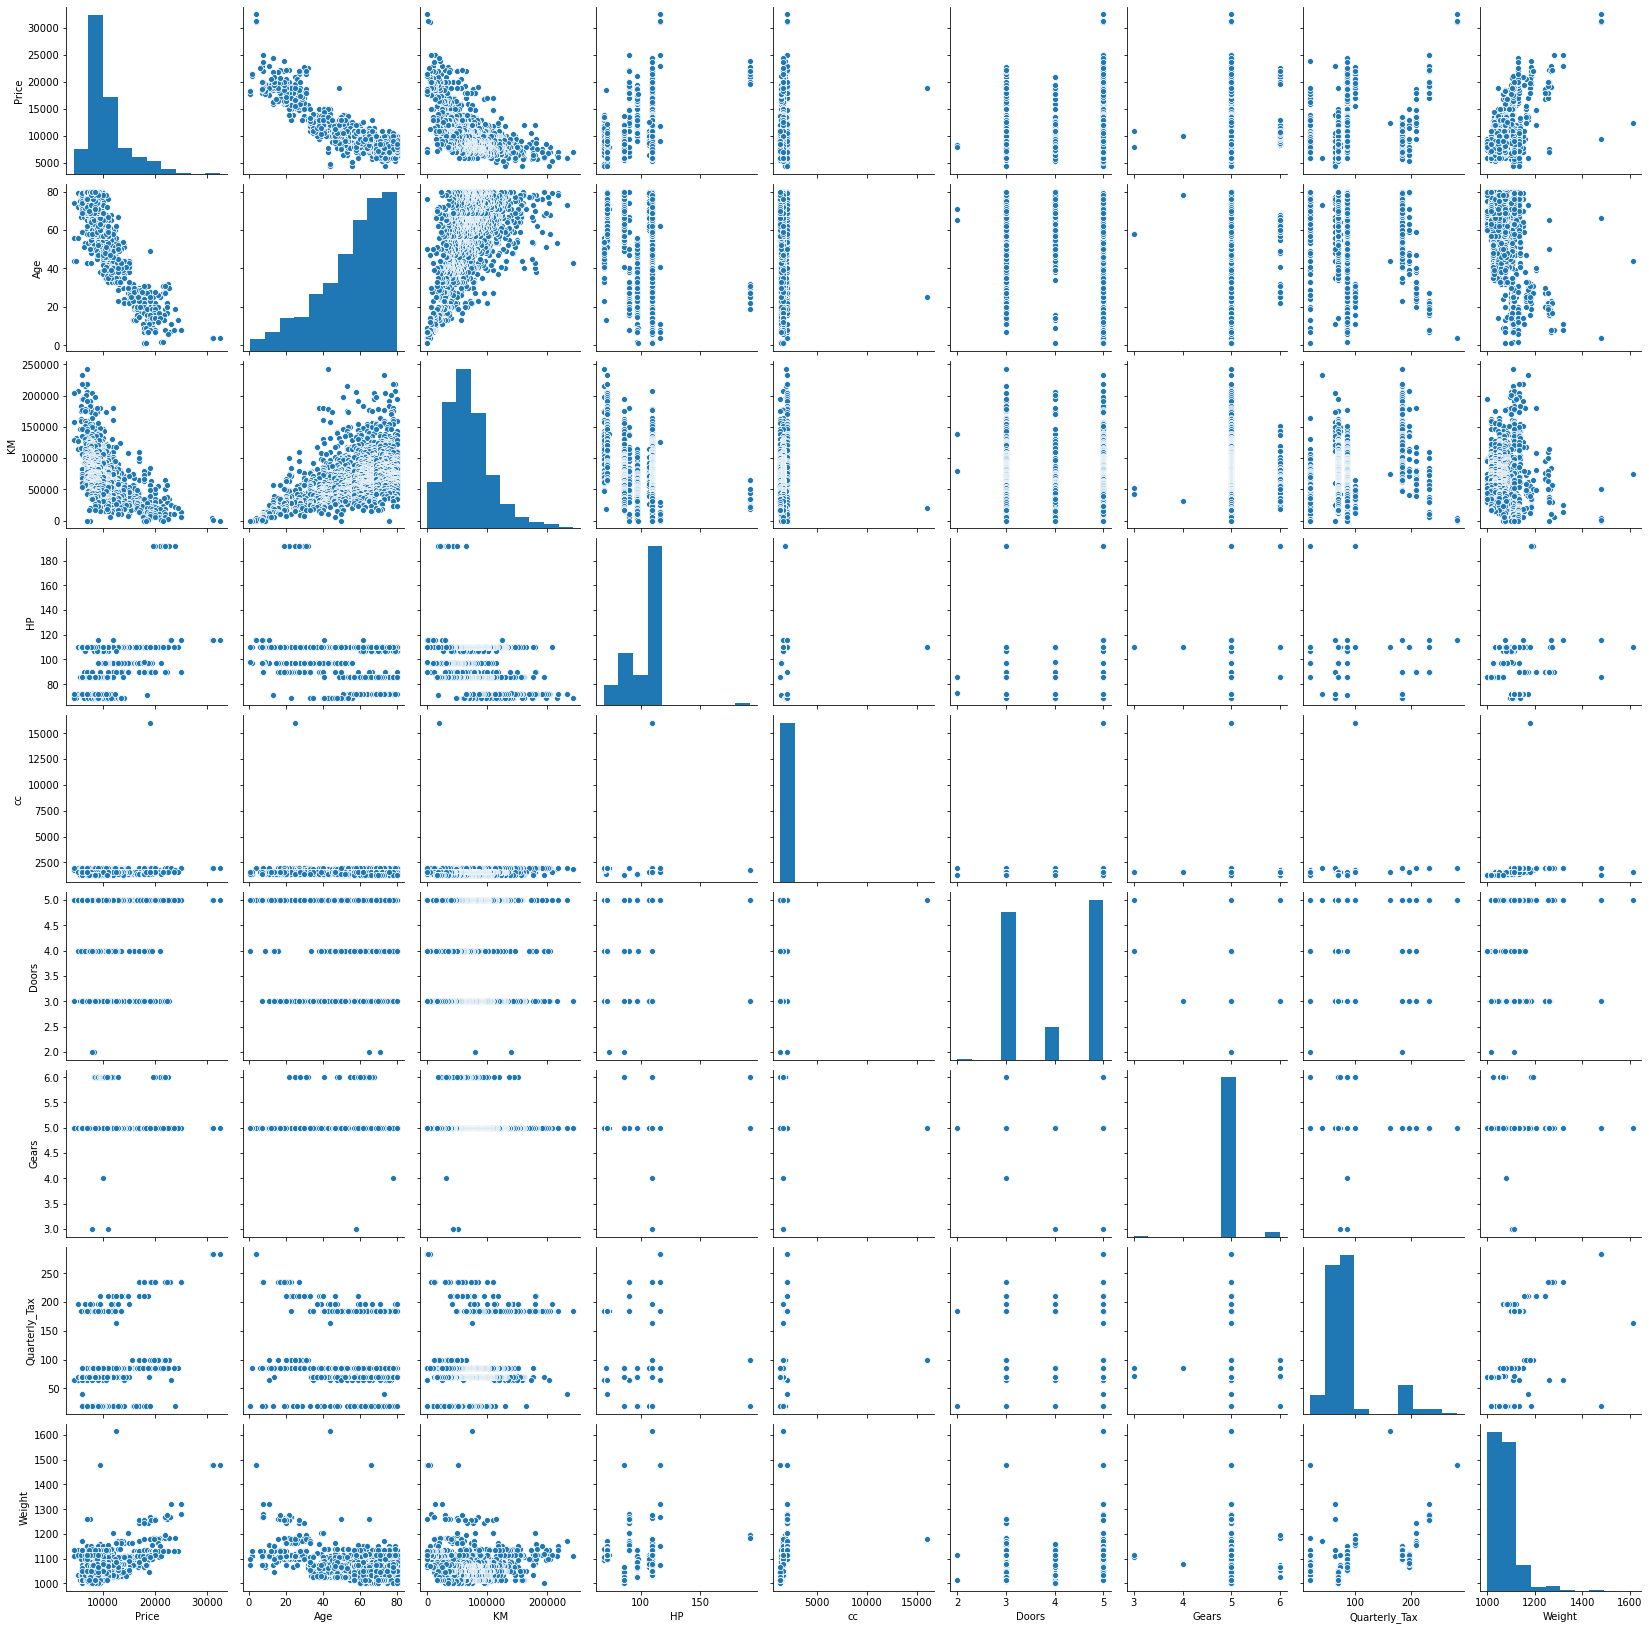

In [23]:
import seaborn as sn
sn.pairplot(toyota2)
correlation_values= toyota2.corr()



In [24]:
import statsmodels.formula.api as smf
m1= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:51:55   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
m1_cc = smf.ols("Price~cc",data= toyota2).fit()
m1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           2.29e-06
Time:                        22:51:55   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
m1_doors = smf.ols("Price~Doors", data= toyota2).fit()
m1_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           2.40e-12
Time:                        22:51:55   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
m1_to = smf.ols("Price~cc+Doors",data= toyota2).fit()
m1_to.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           2.55e-15
Time:                        22:51:56   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_influence = m1.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-29-55ec368c3394>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota2)), np.round(c, 3))


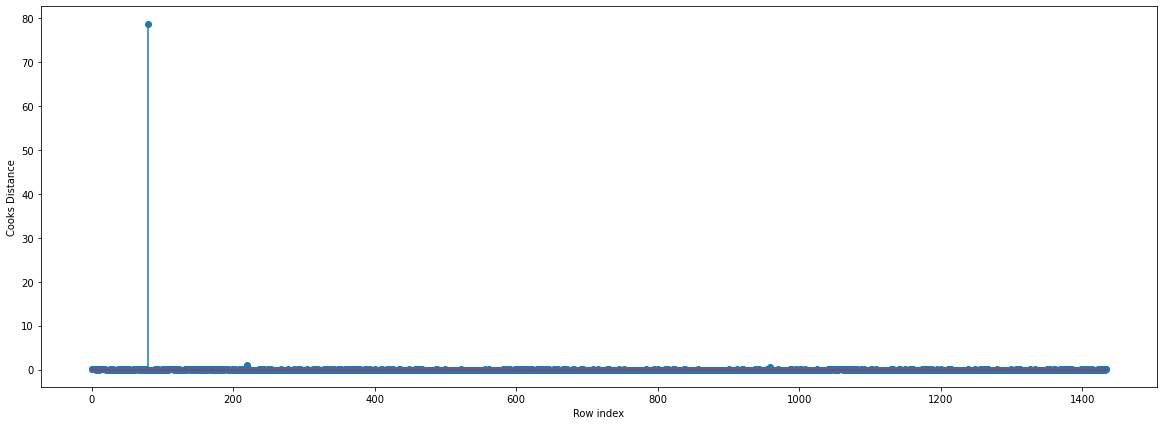

In [29]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
(np.argmax(c),np.max(c))

(80, 78.72950582257265)

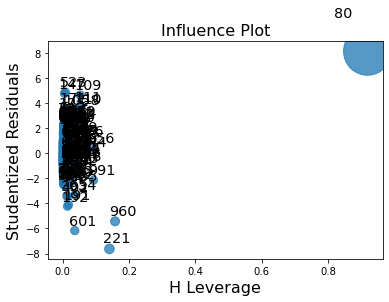

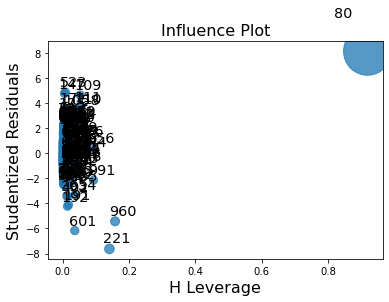

In [31]:
import statsmodels.api as sm
sm.graphics.influence_plot(m1)

In [32]:
toyota3= toyota2.drop(toyota.index[[80]],axis=0).reset_index()


In [33]:
m2= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota3).fit()

In [34]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:09   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age            -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
cc               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

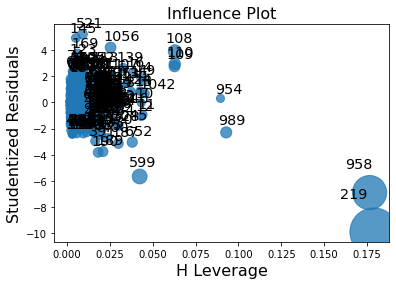

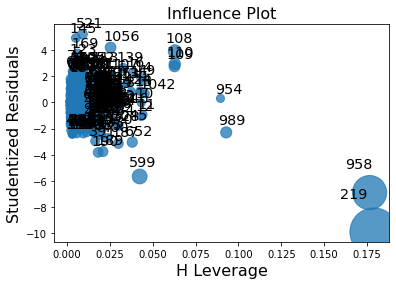

In [35]:
sm.graphics.influence_plot(m2)

In [36]:
model_influence = m2.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-37-c2ec9abfefc1>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota3)), np.round(c, 3))


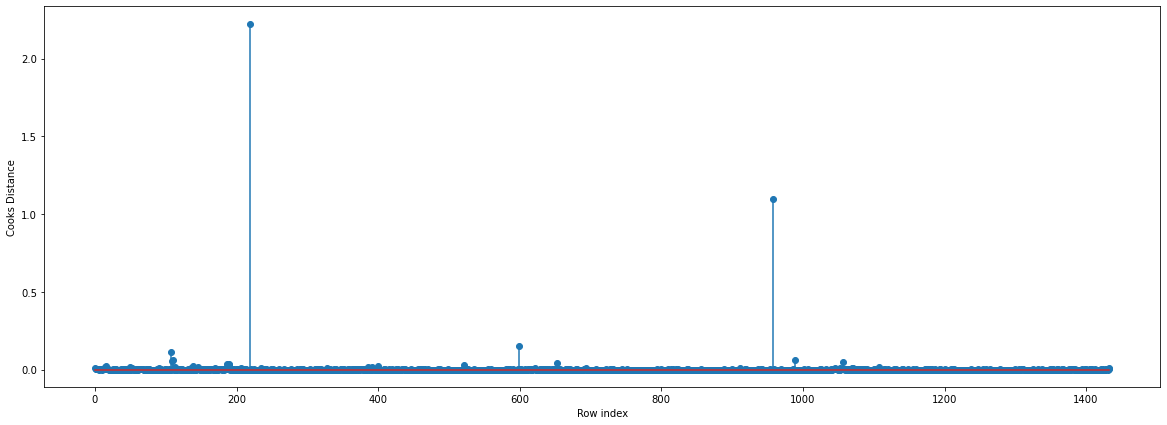

In [37]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(219, 2.225351365527588)

In [39]:
toyota4 = toyota3.drop(toyota.index[[219,958]],axis=0).reset_index()

In [40]:
m4= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota4).fit()
m4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:33   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age            -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM               -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP               36.5587      2.747     13.308      0.000      31.170      41.947
cc               -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors          -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears           466.6014    181.031      2.577      0.010     111.485     821.718
Quarterly_Tax     5.1754      1.373      3.770      0.000       2.482       7.869
Weight           30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
(m4.rsquared,m4.aic)

(0.8839684606741538, 24453.23573612724)

In [42]:
finalmodel = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = toyota4).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:38   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age            -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM               -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP               36.5587      2.747     13.308      0.000      31.170      41.947
cc               -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors          -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears           466.6014    181.031      2.577      0.010     111.485     821.718
Quarterly_Tax     5.1754      1.373      3.770      0.000       2.482       7.869
Weight           30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
finalmodel_pred = finalmodel.predict(toyota4)

Text(0, 0.5, 'Predicted values')

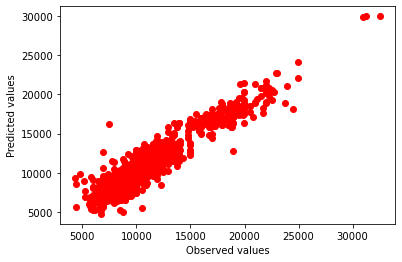

In [44]:
plt.scatter(toyota4["Price"],finalmodel_pred,c='r');plt.xlabel("Observed values");plt.ylabel("Predicted values")

Text(0, 0.5, 'Residuals')

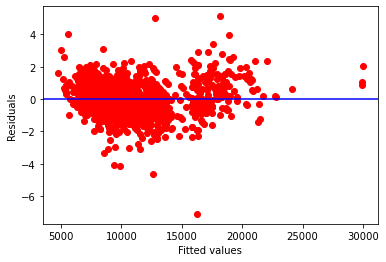

In [45]:
plt.scatter(finalmodel_pred, finalmodel.resid_pearson,c='r');plt.axhline(y=0,color='blue');plt.xlabel("Fitted values");plt.ylabel("Residuals")

(array([  1.,   0.,   3.,  16., 157., 722., 436.,  87.,   6.,   4.]),
 array([-7.10176815, -5.87924795, -4.65672775, -3.43420755, -2.21168735,
        -0.98916715,  0.23335305,  1.45587325,  2.67839344,  3.90091364,
         5.12343384]),
 <a list of 10 Patch objects>)

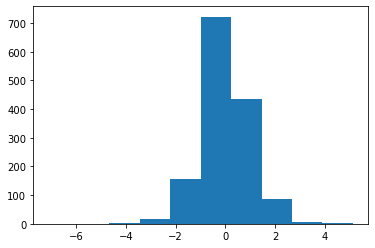

In [46]:
plt.hist(finalmodel.resid_pearson) 

((array([-3.29970984, -3.04210984, -2.89883213, ...,  2.89883213,
          3.04210984,  3.29970984]),
  array([-7.10176815, -4.60735885, -4.14213131, ...,  4.00911367,
          5.00005445,  5.12343384])),
 (0.9842237330634267, -1.4880139570698653e-12, 0.985330099125362))

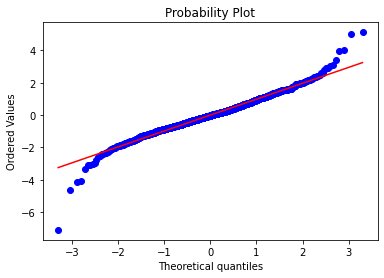

In [47]:
import pylab
import scipy.stats as st
st.probplot(finalmodel.resid_pearson, dist='norm',plot=pylab)

In [48]:
from sklearn.model_selection import train_test_split

train_data,test_Data= train_test_split(toyota4,test_size=0.3)

finalmodel1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1030.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:52:49   Log-Likelihood:                -8513.0
No. Observations:                1002   AIC:                         1.704e+04
Df Residuals:                     993   BIC:                         1.709e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.694e+04   1686.031    -10.045      0.000   -2.02e+04   -1.36e+04
Age            -109.8755      2.824    -38.905      0.000    -115.418    -104.333
KM               -0.0185      0.001    -13.565      0.000      -0.021      -0.016
HP               33.5792      3.198     10.500      0.000      27.304      39.855
cc               -3.5100      0.344    -10.213      0.000      -4.184      -2.836
Doors          -169.6725     43.175     -3.930      0.000    -254.398     -84.947
Gears           634.1716    206.794      3.067      0.002     228.369    1039.974
Quarterly_Tax     2.7784      1.552      1.790      0.074      -0.267       5.824
Weight           32.0931      1.514     21.201      0.000      29.123      35.064
==============================================================================
Omnibus:                       46.701   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.166
Skew:                           0.046   Prob(JB):                     1.11e-32
Kurtosis:                       4.875   Cond. No.                     3.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
finalmodel_pred = finalmodel1.predict(train_data)
finalmodel_pred

193     11944.112273
1258    10297.450620
275     11230.371054
1022    11677.407383
319     13283.423359
            ...     
831      8414.888577
221     13035.418706
1247     8441.592134
409     11042.523510
1003    10413.002953
Length: 1002, dtype: float64

In [50]:
finalmodel_res = train_data["Price"]-finalmodel_pred
finalmodel_res 

193        5.887727
1258   -1347.450620
275     1519.628946
1022    -927.407383
319      666.576641
           ...     
831      535.111423
221     -585.418706
1247      58.407866
409    -2092.523510
1003     536.997047
Length: 1002, dtype: float64

In [51]:
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))
finalmodel_rmse

1184.4677888189678

In [52]:
finalmodel_testpred = finalmodel1.predict(test_Data)
finalmodel_testpred

759      8360.868870
1217     8097.123981
136     23130.756228
1406     6787.333980
1183     7764.408303
            ...     
53      20254.223362
618      8237.775212
676      9565.056687
40      16281.378603
803     10476.249814
Length: 430, dtype: float64

In [53]:
finalmodel_testres= test_Data["Price"]-finalmodel_testpred
finalmodel_testres

759     1534.131130
1217     402.876019
136     -130.756228
1406    1712.666020
1183    -314.408303
           ...     
53      1695.776638
618    -1337.775212
676      384.943313
40     -2331.378603
803     -526.249814
Length: 430, dtype: float64

In [54]:
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))
finalmodel_testrmse

1334.818947999416